In [1]:
import numpy as np
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output, display
from scipy.ndimage import gaussian_filter
from scipy.spatial import distance
from sklearn.cluster import KMeans
import multiprocessing
from functools import partial
import time
import os
from os.path import join
import re

import wolff
import wolff_cross

In [2]:
bin_width = np.pi / 6
angspace = np.arange(-np.pi, np.pi, bin_width)

## Mem experiment 1

In [62]:
start_path = 'data/wolff/decodability_exp1_mem'
save_path = 'data/wolff/decodability_exp1_mem'

In [44]:
for i in range(1, 31):
    print("Doing " + str(i))
    
    file = 'dat_' + str(i) + '.mat'
    save_file = join(save_path, 'dec' + str(i) + '.npy')
    
    dat = scipy.io.loadmat(join(start_path, file))
    data = dat['data']
    mem_angles = np.squeeze(dat['mem_angles'])
    
    if not os.path.exists(save_file):
        cos_amp_left, _ = wolff.similarity_p(data, mem_angles[:, 0], angspace, bin_width, 40)
        cos_amp_right, _ = wolff.similarity_p(data, mem_angles[:, 1], angspace, bin_width, 40)

        cat_mean = np.concatenate((cos_amp_left, cos_amp_right), axis=0).mean(axis=0)
        cos_amp = gaussian_filter(cat_mean, sigma=8)

        np.save(save_file, cos_amp)

1285


In [45]:
dec = []

for i in range(1, 31):
    dec.append(np.load(join(save_path, 'dec' + str(i) + '.npy')))

dec = np.array(dec).mean(axis=0)

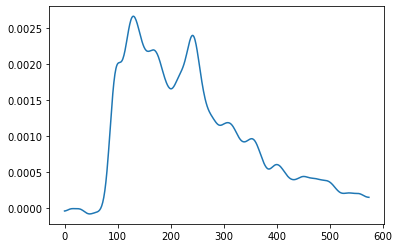

In [46]:
plt.close()
plt.plot(dec)

In [47]:
z = (dec - dec.mean()) / dec.std()
np.save('figures/data/decodability_z_exp1_wolff.npy', z)

In [63]:
time = scipy.io.loadmat(join(start_path, 'dat_1.mat'))['time']
time = np.squeeze(time)

np.save('figures/data/mem_time_exp1.npy', time)

## Impulse experiment 1

In [9]:
start_path = 'data/wolff/decodability_exp1_impulse'
save_path = 'data/wolff/decodability_exp1_impulse'

In [10]:
file = 'dat_1.mat'
save_file_cued = join(save_path, 'cued.npy')
save_file_uncued = join(save_path, 'uncued.npy')

In [15]:
dat = scipy.io.loadmat(join(start_path, file))
data = dat['data']
cue = np.squeeze(dat['cue']) # Location of cued angle (1 means left, 2 means right)
cued_mem_left = np.squeeze(dat['cued_mem_left']) # Orientation of cued items on the left
cued_mem_right = np.squeeze(dat['cued_mem_right'])
uncued_mem_left = np.squeeze(dat['uncued_mem_left'])
uncued_mem_right = np.squeeze(dat['uncued_mem_right'])

In [19]:
cos_amp_cued_left, _ = wolff.similarity_p(data[cue==1], cued_mem_left, angspace, bin_width, 40)
cos_amp_cued_right, _ = wolff.similarity_p(data[cue==2], cued_mem_right, angspace, bin_width, 40)

cat_mean = np.concatenate((cos_amp_cued_left, cos_amp_cued_right), axis=0).mean(axis=0)
cos_amp_cued = gaussian_filter(cat_mean, sigma=8)

np.save(save_file_cued, cos_amp_cued)

632


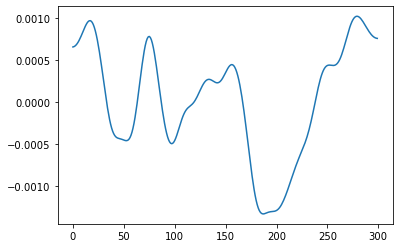

In [28]:
plt.plot(cos_amp_cued)

In [29]:
cos_amp_uncued_left, _ = wolff.similarity_p(data[cue==2], uncued_mem_left, angspace, bin_width, 40)
cos_amp_uncued_right, _ = wolff.similarity_p(data[cue==1], uncued_mem_right, angspace, bin_width, 40)

cat_mean = np.concatenate((cos_amp_uncued_left, cos_amp_uncued_right), axis=0).mean(axis=0)
cos_amp_uncued = gaussian_filter(cat_mean, sigma=8)

np.save(save_file_uncued, cos_amp_uncued)

629


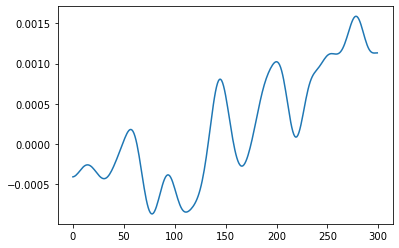

In [31]:
plt.plot(np.load(save_file_uncued))

In [ ]:
for i in range(1, 31):
    print("Doing " + str(i))
    
    file = 'dat_' + str(i) + '.mat'
    save_file_cued = join(save_path, 'cued' + str(i) + '.npy')
    save_file_uncued = join(save_path, 'uncued' + str(i) + '.npy')
    
    dat = scipy.io.loadmat(join(start_path, file))
    data = dat['data']
    cue = np.squeeze(dat['cue']) # Location of cued angle (1 means left, 2 means right)
    cued_mem_left = np.squeeze(dat['cued_mem_left']) # Orientation of cued items on the left
    cued_mem_right = np.squeeze(dat['cued_mem_right'])
    uncued_mem_left = np.squeeze(dat['uncued_mem_left'])
    uncued_mem_right = np.squeeze(dat['uncued_mem_right'])
    
    if not os.path.exists(save_file_cued):
        cos_amp_cued_left, _ = wolff.similarity_p(data[cue==1], cued_mem_left, angspace, bin_width, 40)
        cos_amp_cued_right, _ = wolff.similarity_p(data[cue==2], cued_mem_right, angspace, bin_width, 40)

        cat_mean = np.concatenate((cos_amp_cued_left, cos_amp_cued_right), axis=0).mean(axis=0)
        cos_amp_cued = gaussian_filter(cat_mean, sigma=8)

        np.save(save_file_cued, cos_amp_cued)
        
    if not os.path.exists(save_file_uncued):
        cos_amp_uncued_left, _ = wolff.similarity_p(data[cue==2], uncued_mem_left, angspace, bin_width, 40)
        cos_amp_uncued_right, _ = wolff.similarity_p(data[cue==1], uncued_mem_right, angspace, bin_width, 40)

        cat_mean = np.concatenate((cos_amp_uncued_left, cos_amp_uncued_right), axis=0).mean(axis=0)
        cos_amp_uncued = gaussian_filter(cat_mean, sigma=8)

        np.save(save_file_uncued, cos_amp_uncued)

471


In [33]:
dec_cued = []
dec_uncued = []

for i in range(1, 31):
    dec_cued.append(np.load(join(save_path, 'cued' + str(i) + '.npy')))
    dec_uncued.append(np.load(join(save_path, 'uncued' + str(i) + '.npy')))

dec_cued = np.array(dec_cued).mean(axis=0)
dec_uncued = np.array(dec_uncued).mean(axis=0)

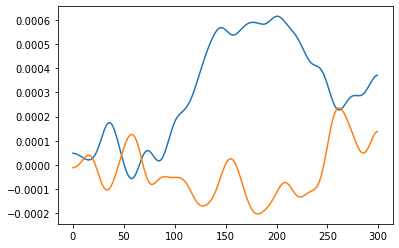

In [34]:
plt.close()

plt.plot(dec_cued)
plt.plot(dec_uncued)

In [35]:
cat_mean = np.concatenate((dec_cued, dec_uncued), axis=0).mean()
cat_std = np.concatenate((dec_cued, dec_uncued), axis=0).std()

z_cued = (dec_cued - cat_mean) / cat_std
z_uncued = (dec_uncued - cat_mean) / cat_std

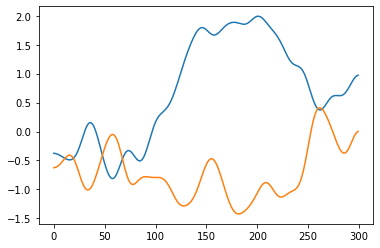

In [36]:
plt.close()

plt.plot(z_cued)
plt.plot(z_uncued)

In [37]:
time = dat['time']

In [41]:
np.save('figures/data/decodability_z_cued_wolff.npy', z_cued)
np.save('figures/data/decodability_z_uncued_wolff.npy', z_uncued)
np.save('figures/data/impulse_time_exp1.npy', np.squeeze(time))

In [42]:
time.shape

(1, 300)

## Mem experiment 2

In [48]:
start_path = 'data/wolff/decodability_exp2_mem'
save_path = 'data/wolff/decodability_exp2_mem'

In [51]:
dec_early = []
dec_late = []

for i in range(1, 20):
    print("Doing " + str(i))
    
    file = 'dat_' + str(i) + '.mat'
    save_file_early = join(save_path, 'early' + str(i) + '.npy')
    save_file_late = join(save_path, 'late' + str(i) + '.npy')
    
    dat = scipy.io.loadmat(join(start_path, file))
    data1 = dat['data1']
    data2 = dat['data2']
    mem_angles1 = dat['mem_angles1'] # early at [:, 0], late at [:, 1]
    mem_angles2 = dat['mem_angles2']
    
    dec_early1, _ = wolff.similarity_p(data1, mem_angles1[:, 0], angspace, bin_width, 60)
    dec_late1, _ = wolff.similarity_p(data1, mem_angles1[:, 1], angspace, bin_width, 60)
    
    dec_early2, _ = wolff.similarity_p(data2, mem_angles2[:, 0], angspace, bin_width, 60)
    dec_late2, _ = wolff.similarity_p(data2, mem_angles2[:, 1], angspace, bin_width, 60)
    
    _dec_early = (dec_early1.mean(0) + dec_early2.mean(0)) / 2
    _dec_early = gaussian_filter(_dec_early, sigma=8)
    np.save(save_file_early, _dec_early)
    
    _dec_late = (dec_late1.mean(0) + dec_late2.mean(0)) / 2
    _dec_late = gaussian_filter(_dec_late, sigma=8)
    np.save(save_file_late, _dec_late)
    
    dec_early.append(_dec_early)
    dec_late.append(_dec_late)

848


In [52]:
dec_early = np.array(dec_early).mean(0)
dec_late = np.array(dec_late).mean(0)

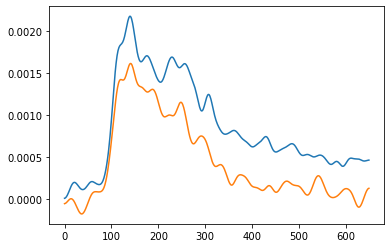

In [53]:
plt.close()

plt.plot(dec_early)
plt.plot(dec_late)

In [54]:
cat_mean = np.concatenate((dec_early, dec_late), axis=0).mean()
cat_std = np.concatenate((dec_early, dec_late), axis=0).std()

z_early = (dec_early - cat_mean) / cat_std
z_late = (dec_late - cat_mean) / cat_std

np.save('figures/data/decodability_z_early_wolff.npy', z_early)
np.save('figures/data/decodability_z_late_wolff.npy', z_late)

In [55]:
time = scipy.io.loadmat(join(start_path, 'dat_1.mat'))['time']
time = np.squeeze(time)

np.save('figures/data/mem_time_exp2.npy', time)

## Impulse experiment 2

In [56]:
start_path = 'data/wolff/decodability_exp2_impulse'
save_path = 'data/wolff/decodability_exp2_impulse'

In [ ]:
for i in range(1, 20):
    print("Doing " + str(i))
    
    file = 'dat_' + str(i) + '.mat'
    save_file_early1 = join(save_path, 'early1_' + str(i) + '.npy')
    save_file_early2 = join(save_path, 'early2_' + str(i) + '.npy')
    save_file_late1 = join(save_path, 'late1_' + str(i) + '.npy')
    save_file_late2 = join(save_path, 'late2_' + str(i) + '.npy')
    
    dat = scipy.io.loadmat(join(start_path, file))
    data_imp1_sess1 = dat['data_imp1_sess1']
    data_imp2_sess1 = dat['data_imp2_sess1']
    data_imp1_sess2 = dat['data_imp1_sess2']
    data_imp2_sess2 = dat['data_imp2_sess2']
    mem_angles_imp1_sess1 = dat['mem_angles_imp1_sess1'] # early at [:, 0], late at [:, 1]
    mem_angles_imp2_sess1 = dat['mem_angles_imp2_sess1']
    mem_angles_imp1_sess2 = dat['mem_angles_imp1_sess2']
    mem_angles_imp2_sess2 = dat['mem_angles_imp2_sess2']
    
    # Decoding session 1
    dec_imp1_early1, _ = wolff.similarity_p(data_imp1_sess1, mem_angles_imp1_sess1[:, 0], angspace, bin_width, 60)
    dec_imp1_late1, _ = wolff.similarity_p(data_imp1_sess1, mem_angles_imp1_sess1[:, 1], angspace, bin_width, 60)
    dec_imp2_early1, _ = wolff.similarity_p(data_imp2_sess1, mem_angles_imp2_sess1[:, 0], angspace, bin_width, 60)
    dec_imp2_late1, _ = wolff.similarity_p(data_imp2_sess1, mem_angles_imp2_sess1[:, 1], angspace, bin_width, 60)
    
    # Decoding session 2
    dec_imp1_early2, _ = wolff.similarity_p(data_imp1_sess2, mem_angles_imp1_sess2[:, 0], angspace, bin_width, 60)
    dec_imp1_late2, _ = wolff.similarity_p(data_imp1_sess2, mem_angles_imp1_sess2[:, 1], angspace, bin_width, 60)
    dec_imp2_early2, _ = wolff.similarity_p(data_imp2_sess2, mem_angles_imp2_sess2[:, 0], angspace, bin_width, 60)
    dec_imp2_late2, _ = wolff.similarity_p(data_imp2_sess2, mem_angles_imp2_sess2[:, 1], angspace, bin_width, 60)
    
    # Averaging impulse 1
    dec_imp1_early = (dec_imp1_early1.mean(0) + dec_imp1_early2.mean(0)) / 2
    dec_imp1_early = gaussian_filter(dec_imp1_early, sigma=8)
    dec_imp1_late = (dec_imp1_late1.mean(0) + dec_imp1_late2.mean(0)) / 2
    dec_imp1_late = gaussian_filter(dec_imp1_late, sigma=8)
    
    # Averaging impulse 2
    dec_imp2_early = (dec_imp2_early1.mean(0) + dec_imp2_early2.mean(0)) / 2
    dec_imp2_early = gaussian_filter(dec_imp2_early, sigma=8)
    dec_imp2_late = (dec_imp2_late1.mean(0) + dec_imp2_late2.mean(0)) / 2
    dec_imp2_late = gaussian_filter(dec_imp2_late, sigma=8)
    
    # Saving the results
    np.save(save_file_early1, dec_imp1_early)
    np.save(save_file_late1, dec_imp1_late)
    np.save(save_file_early2, dec_imp2_early)
    np.save(save_file_late2, dec_imp2_late)

In [57]:
dec_imp1_early = []
dec_imp1_late = []
dec_imp2_early = []
dec_imp2_late = []

for i in range(1, 20):
    save_file_early1 = join(save_path, 'early1_' + str(i) + '.npy')
    save_file_early2 = join(save_path, 'early2_' + str(i) + '.npy')
    save_file_late1 = join(save_path, 'late1_' + str(i) + '.npy')
    save_file_late2 = join(save_path, 'late2_' + str(i) + '.npy')
    
    dec_imp1_early.append(np.load(save_file_early1))
    dec_imp1_late.append(np.load(save_file_late1))
    dec_imp2_early.append(np.load(save_file_early2))
    dec_imp2_late.append(np.load(save_file_late2))
    
dec_imp1_early = np.array(dec_imp1_early).mean(0)
dec_imp1_late = np.array(dec_imp1_late).mean(0)
dec_imp2_early = np.array(dec_imp2_early).mean(0)
dec_imp2_late = np.array(dec_imp2_late).mean(0)

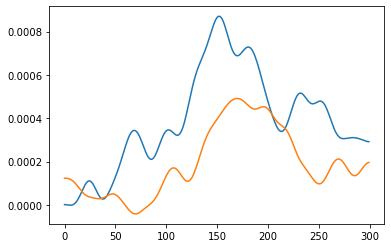

In [58]:
plt.close()

plt.plot(dec_imp1_early)
plt.plot(dec_imp1_late)

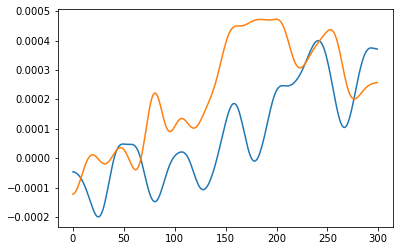

In [59]:
plt.close()

plt.plot(dec_imp2_early)
plt.plot(dec_imp2_late)

In [60]:
cat = np.concatenate((dec_imp1_early, dec_imp1_late, dec_imp2_early, dec_imp2_late), axis=0)
cat_mean = cat.mean()
cat_std = cat.std()

z_imp1_early = (dec_imp1_early - cat_mean) / cat_std
z_imp1_late = (dec_imp1_late - cat_mean) / cat_std
z_imp2_early = (dec_imp2_early - cat_mean) / cat_std
z_imp2_late = (dec_imp2_late - cat_mean) / cat_std

In [61]:
np.save('figures/data/z_imp1_early_wolff.npy', z_imp1_early)
np.save('figures/data/z_imp1_late_wolff.npy', z_imp1_late)
np.save('figures/data/z_imp2_early_wolff.npy', z_imp2_early)
np.save('figures/data/z_imp2_late_wolff.npy', z_imp2_late)

In [65]:
scipy.io.loadmat('data/wolff/decodability_exp2_impulse/dat_1.mat')['time']

array([[-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0.056, -0.054,
        -0.052, -0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 , -0.038,
        -0.036, -0.034, -0.032, -0.03 , -0.028, -0.026, -0.024, -0.022,
        -0.02 , -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008, -0.006,
        -0.004, -0.002, -0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,
         0.012,  0.014,  0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,
         0.028,  0.03 ,  0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,
         0.044,  0.046,  0.048,  0.05 ,  0.052,  0.054,  0.056,  0.058,
         0.06 ,  0.062,  0.064,  0.066,  0.068,  0.07 ,  0.072,  0.074,
         0.076,  0.078,  0.08 ,  0.082,  0.084,  0.086,  0.088,  0.09 ,
         0.092,  0.094,  0.096,  0.098,  0.1  ,  0.102,  0.104,  0.106,
         0.108,  0.11 ,  0.112,  0.114,  0.116,  0.118,  0.12 , 